In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (16./3, 9./3)

In [2]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
y_train = 0.5 * x_train + 1.0 + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

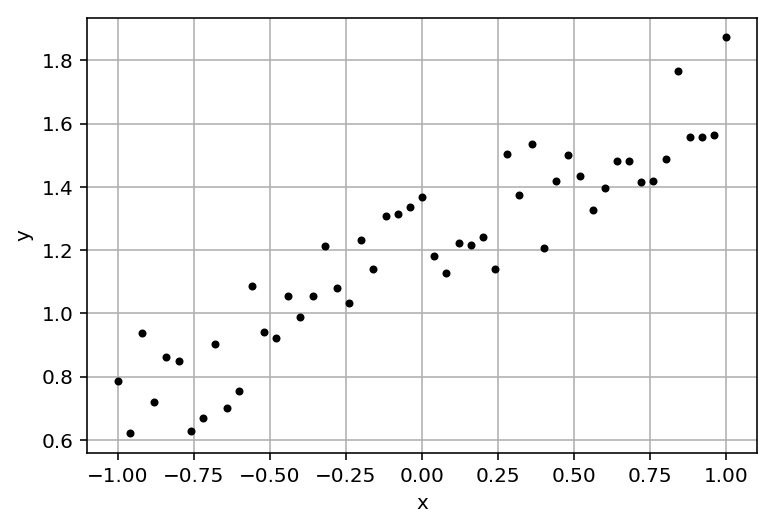

In [3]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# 기울기와 y절편
w = tf.Variable(tf.ones([1,1]), dtype=tf.float32)
b = tf.Variable(tf.ones([1]), dtype=tf.float32)

# 데이터 x좌표
x = tf.placeholder(tf.float32, [None, 1])

# 예측 모델
yhat = tf.matmul(x,w) + b

In [5]:
# 데이터 y좌표
y = tf.placeholder(tf.float32, [None, 1])

# 손실함수
loss = tf.reduce_mean(tf.square(yhat - y))

In [6]:
# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [7]:
# 결정론적 방법
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w, b, loss], 
                                                 feed_dict={x:x_train, 
                                                            y:y_train})
            print(curr_w, curr_b, curr_loss)
        sess.run(train, feed_dict={x:x_train, y:y_train})
    w_tf_gd, b_tf_gd = sess.run([w, b])

[[1.]] [1.] 0.14998727
[[0.6727577]] [1.1888978] 0.028191052
[[0.54642326]] [1.1948009] 0.015662618
[[0.49765092]] [1.1949854] 0.013800872
[[0.478822]] [1.1949911] 0.013523399


In [8]:
#결정론적 방법
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        sess.run(train, feed_dict={x:x_train, y:y_train})
    w_tf_gd, b_tf_gd = sess.run([w, b])

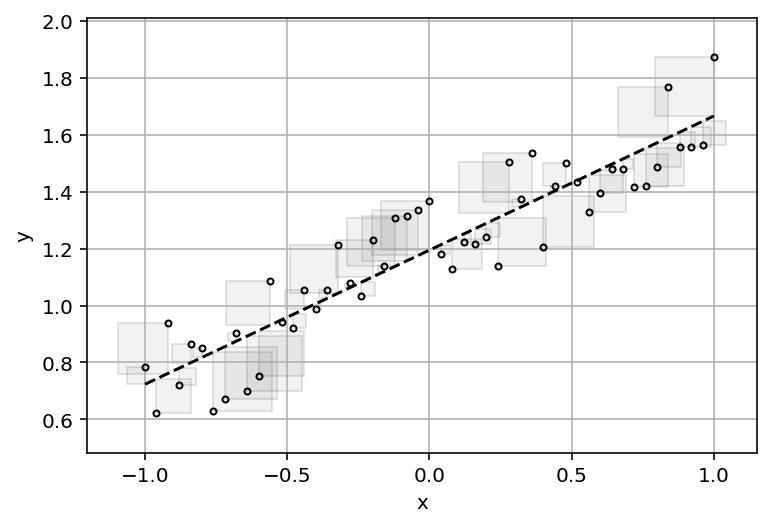

In [9]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

visualize_l2(w_tf_gd, b_tf_gd, x_train, x_train, y_train)

In [10]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = x_train[shuffled_id]
shuffled_y_train = y_train[shuffled_id]

In [11]:
# 스토캐스틱 방법
from helper import generate_batches
batch_size = 5
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w, b, loss],
                                                 feed_dict={x:x_train,
                                                            y:y_train})
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size,
                                                 shuffled_x_train,
                                                 shuffled_y_train):
            # feed_dict에 반드시 미니 뱃치가 들어가야합니다.
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    
    w_tf_sgd, b_tf_sgd = sess.run([w, b])

[[1.]] [1.] 0.14998727
[[0.4888436]] [1.1834033] 0.0137747675
[[0.48882985]] [1.1833994] 0.013774646
[[0.48882985]] [1.1833994] 0.013774646
[[0.48882985]] [1.1833994] 0.013774646


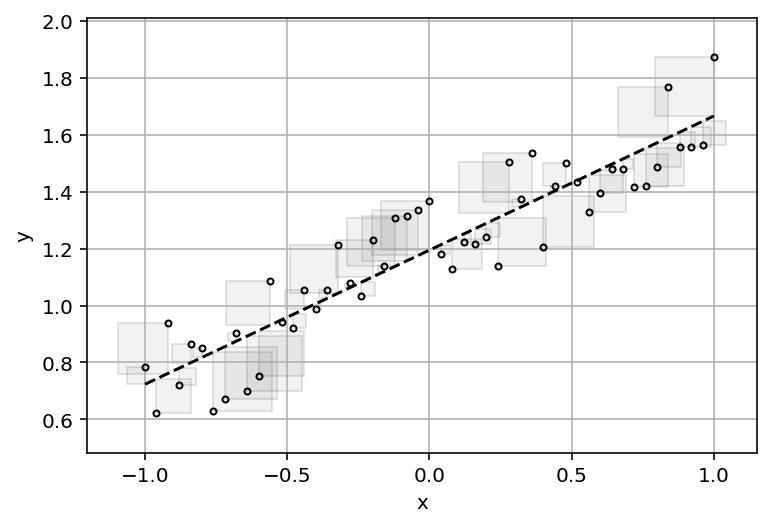

In [12]:
visualize_l2(w_tf_gd, b_tf_gd, x_train, x_train, y_train)

In [13]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**2 + 0.25 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

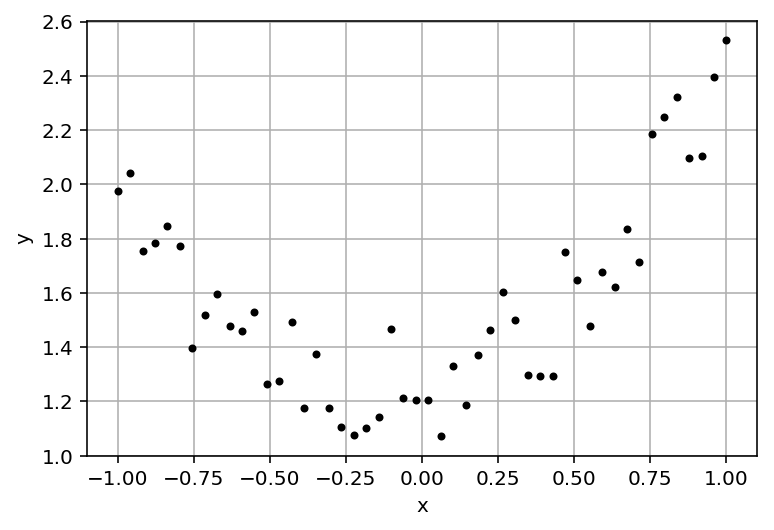

In [14]:
# 분포도
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
# 특성값 정의
features = np.array([[xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [16]:
# 예측 모델과 손실함수
w = tf.Variable(tf.ones([2, 1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x, w) + b
loss = tf.reduce_mean(tf.square( yhat - y))

In [17]:
# 수치최적화 알고리즘
MaxEpoch = 25
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [18]:
# 스토캐스틱 방법
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(25):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w, b, loss],
                                                 feed_dict={x:features,
                                                            y:labels})
            print(curr_w.reshape(1,-1), curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size,
                                                 shuffled_x_train,
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    
    w_tf_sgd, b_tf_sgd = sess.run([w, b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

[[1. 1.]] [1.] 0.27033687
[[1.076062   0.23619145]] [1.1704177] 0.01800622
[[1.0612648  0.23138306]] [1.1769375] 0.017824525
[[1.0563606  0.23150262]] [1.1790168] 0.017778212
[[1.0547773  0.23155315]] [1.1796876] 0.01776432


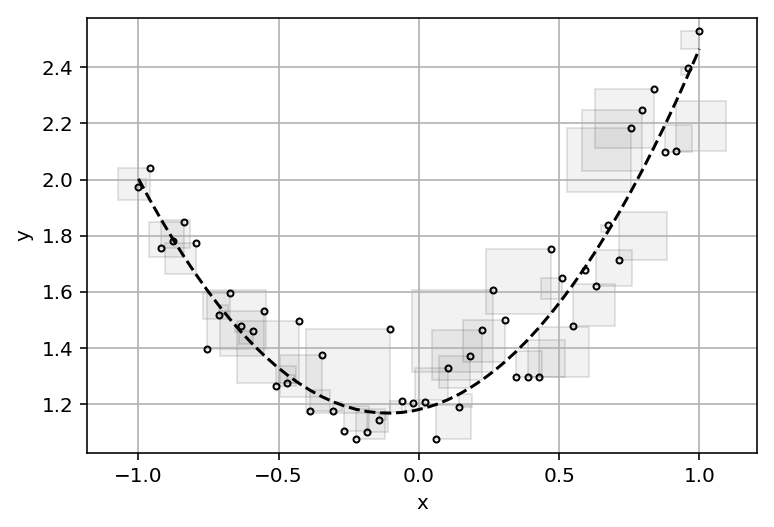

In [19]:
visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, y_train)

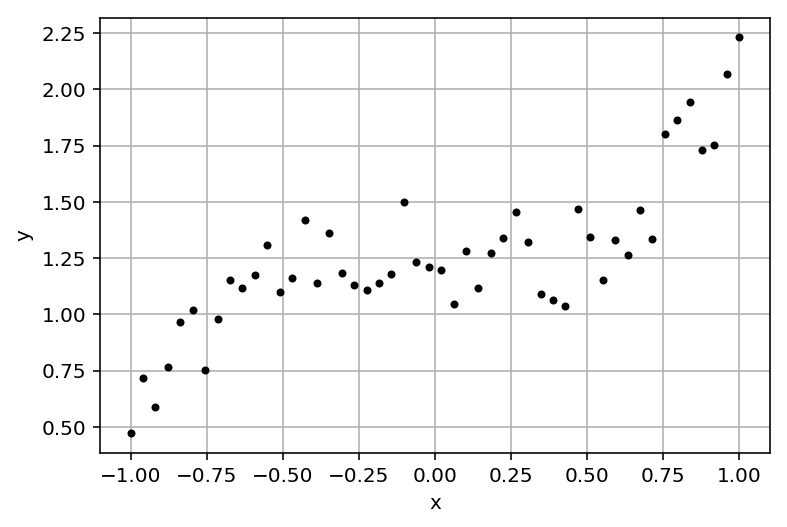

In [20]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2  -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
# 특성값 정의
features = np.array([[xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [22]:
# 예측 모델과 손실함수
w = tf.Variable(tf.ones([3, 1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 3])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x, w) + b
loss = tf.reduce_mean(tf.square( yhat - y))

In [23]:
# 수치최적화 알고리즘
MaxEpoch = 25
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [24]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w, b, loss],
                                                 feed_dict={x:features,
                                                            y:labels})
            print(curr_w.reshape(1,-1), curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size,
                                                 shuffled_x_train,
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    
    w_tf_sgd, b_tf_sgd = sess.run([w, b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

[[1. 1. 1.]] [1.] 0.57014674
[[0.57525814 0.42941985 0.10803682]] [1.0714246] 0.03189389
[[0.6731134  0.24562356 0.04974759]] [1.1476407] 0.021883728
[[0.7469721  0.18626072 0.00303175]] [1.1714399] 0.019629695
[[ 0.8040568   0.16686103 -0.03414325]] [1.1785893] 0.018755484


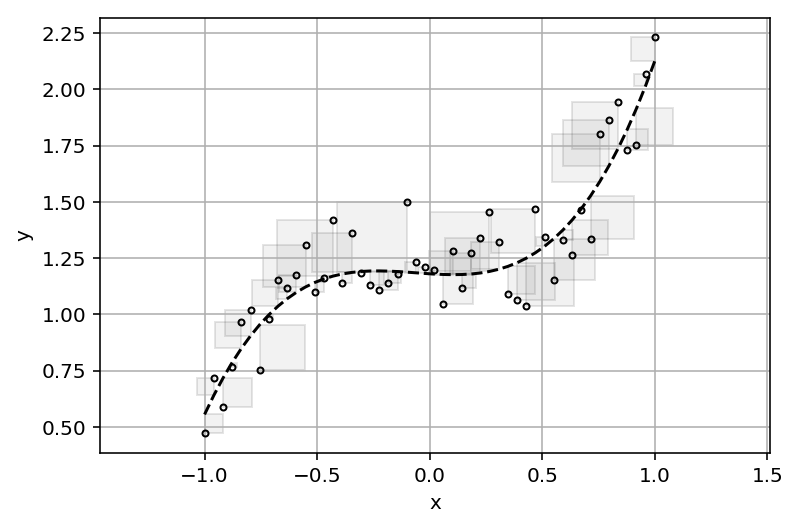

In [25]:
visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, labels)

In [26]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = 0.25 * np.cos(np.pi * x_train) + 0.3 * np.sin(np.pi * x_train) + 0.2 * (2 * np.random.rand(len(x_train)) - 1)

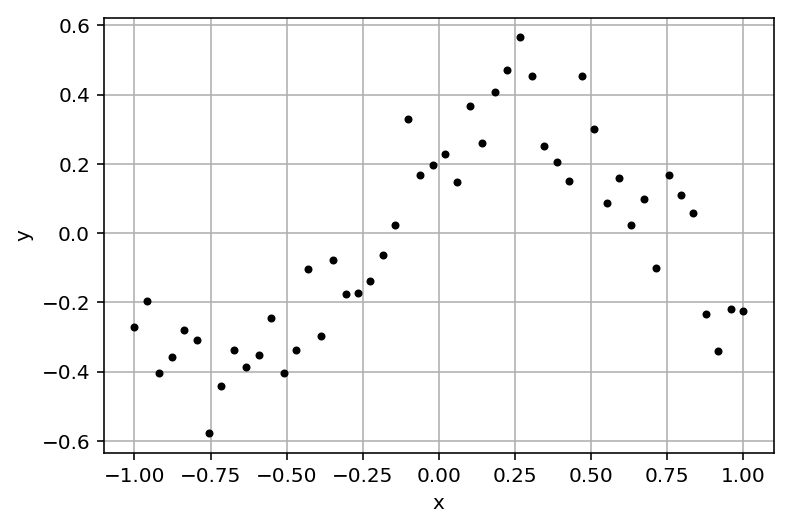

In [27]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
# 특성값 정의
features = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)]
                     for xval in x_train])
labels = y_train.reshape(-1, 1)

In [29]:
# 예측 모델과 손실함수
w = tf.Variable(tf.ones([2, 1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x, w) + b
loss = tf.reduce_mean(tf.square( yhat - y))

# 수치최적화 알고리즘
MaxEpoch = 25
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [30]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w, b, loss],
                                                 feed_dict={x:features,
                                                            y:labels})
            print(curr_w.reshape(1,-1), curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size,
                                                 shuffled_x_train,
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    
    w_tf_sgd, b_tf_sgd = sess.run([w, b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

[[1. 1.]] [1.] 1.5639328
[[0.23110393 0.2858727 ]] [-0.0394818] 0.0113843335
[[0.23096298 0.28525737]] [-0.0394916] 0.011390009
[[0.23096305 0.28525692]] [-0.03949159] 0.011390012
[[0.23096305 0.28525692]] [-0.03949159] 0.011390012


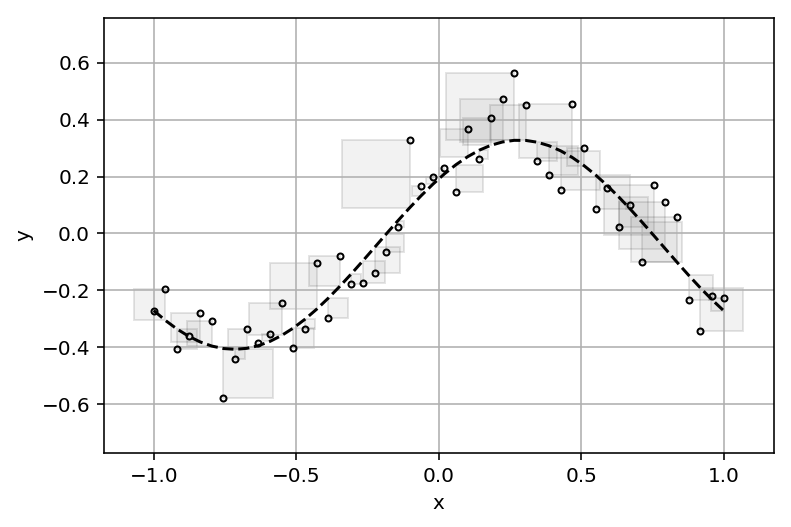

In [31]:
visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, labels)

In [32]:
# 특성값 정의
features = np.array([[xval**4, xval**3, xval**2, xval] 
                     for xval in x_train])
labels = y_train.reshape(-1, 1)

# 예측 모델과 손실함수
w = tf.Variable(tf.ones([4, 1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 4])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x, w) + b
loss = tf.reduce_mean(tf.square( yhat - y))

In [33]:
# 수치최적화 알고리즘
MaxEpoch = 50
batch_size = 10
lr = 0.5
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w, b, loss],
                                                 feed_dict={x:features,
                                                            y:labels})
            print(curr_w.reshape(1,-1), curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size,
                                                 shuffled_x_train,
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    
    w_tf_sgd, b_tf_sgd = sess.run([w, b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

[[1. 1. 1. 1.]] [1.] 3.8419266
[[-0.05147389 -0.04418148 -0.39186257  0.26385254]] [0.08200131] 0.03404133
[[ 0.01711442 -0.34243575 -0.4615101   0.4670539 ]] [0.10662897] 0.022222476
[[ 0.08249484 -0.523451   -0.51772135  0.5890346 ]] [0.11978491] 0.01759487
[[ 0.1397632 -0.632903  -0.5684435  0.6623654]] [0.12959829] 0.01558239
[[ 0.19043499 -0.69916683 -0.6144026   0.7063911 ]] [0.13729417] 0.01459003
[[ 0.23565817 -0.7393685  -0.65609133  0.7327666 ]] [0.14355285] 0.01402134
[[ 0.27626035 -0.76383525 -0.69393265  0.74851674]] [0.14879775] 0.013646832
[[ 0.31286216 -0.77879506 -0.72829735  0.75787497]] [0.15329742] 0.013374035
[[ 0.3459485  -0.7880043  -0.75951433  0.7633921 ]] [0.157226] 0.0131626995


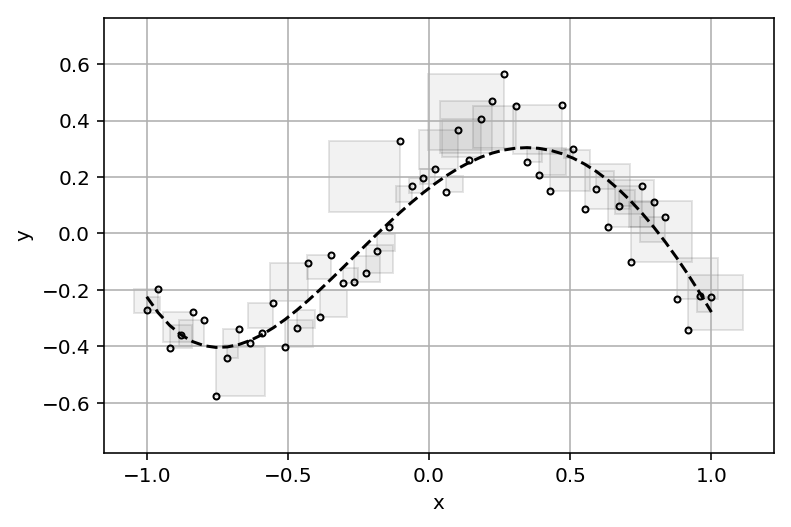

In [34]:
visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, labels)